In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset from the GitHub
data = pd.read_csv("https://raw.githubusercontent.com/ryoshi007/Datasets/main/pca-dataset.csv")
data

,x,y
0,0.5,0.7
1,1.0,1.1
2,1.5,1.6
3,1.1,0.9
4,1.9,2.2
5,2.2,2.9
6,2.6,2.7
7,2.0,1.6
8,2.5,2.4
9,3.1,3.0


In [3]:
# Standardize the features
sc = StandardScaler()
std_data = sc.fit_transform(data)
std_data

array([[-1.740994  , -1.506743  ],
       [-1.09136937, -1.00864614],
       [-0.44174475, -0.38602507],
       [-0.96144445, -1.25769457],
       [ 0.07795496,  0.36112022],
       [ 0.46772973,  1.23278973],
       [ 0.98742943,  0.9837413 ],
       [ 0.20787988, -0.38602507],
       [ 0.85750451,  0.61016865],
       [ 1.63705406,  1.35731394]])

In [4]:
# Construct the covariance matrix
cov_mat = np.cov(std_data.T)

In [5]:
# Obtain the eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [6]:
# Print the eigenvalues and eigenvector
print("Eigenvalues")
print(eigen_vals)
print("")
print("Eigenvector")
print(eigen_vecs)

Eigenvalues
[2.1494305  0.07279173]

Eigenvector
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


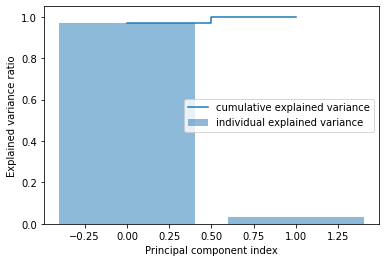

In [7]:
# Calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.bar(range(0,2), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,2), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

We could see that the first principal component contains around 98% of the information (variance).

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
# Show the ordered eigenpairs
print(eigen_pairs)

[(2.149430495007601, array([0.70710678, 0.70710678])), (0.07279172721462168, array([-0.70710678,  0.70710678]))]


In [10]:
# Print the feature vector
w = np.hstack((eigen_pairs[0][1][:, np.newaxis]))
print('Feature Vector:\n', w)

Feature Vector:
 [0.70710678 0.70710678]


In [11]:
# Obtain the 1D dataset
pca_data = std_data.dot(w)
pca_data

array([-2.29649685, -1.48493521, -0.58532165, -1.56916825,  0.31047304,
        1.20244884,  1.39382819, -0.12596767,  1.03780164,  2.11733792])